## Imports


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [3]:
df = pd.read_csv('../DATA/heart.csv')

In [4]:
len(df)

303

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df['target'].unique()

array([1, 0])

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<Axes: xlabel='target', ylabel='count'>

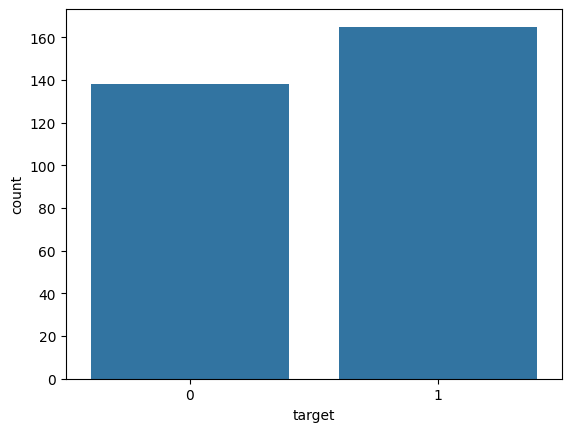

In [ ]:

sns.countplot(data = df  , x = "target")

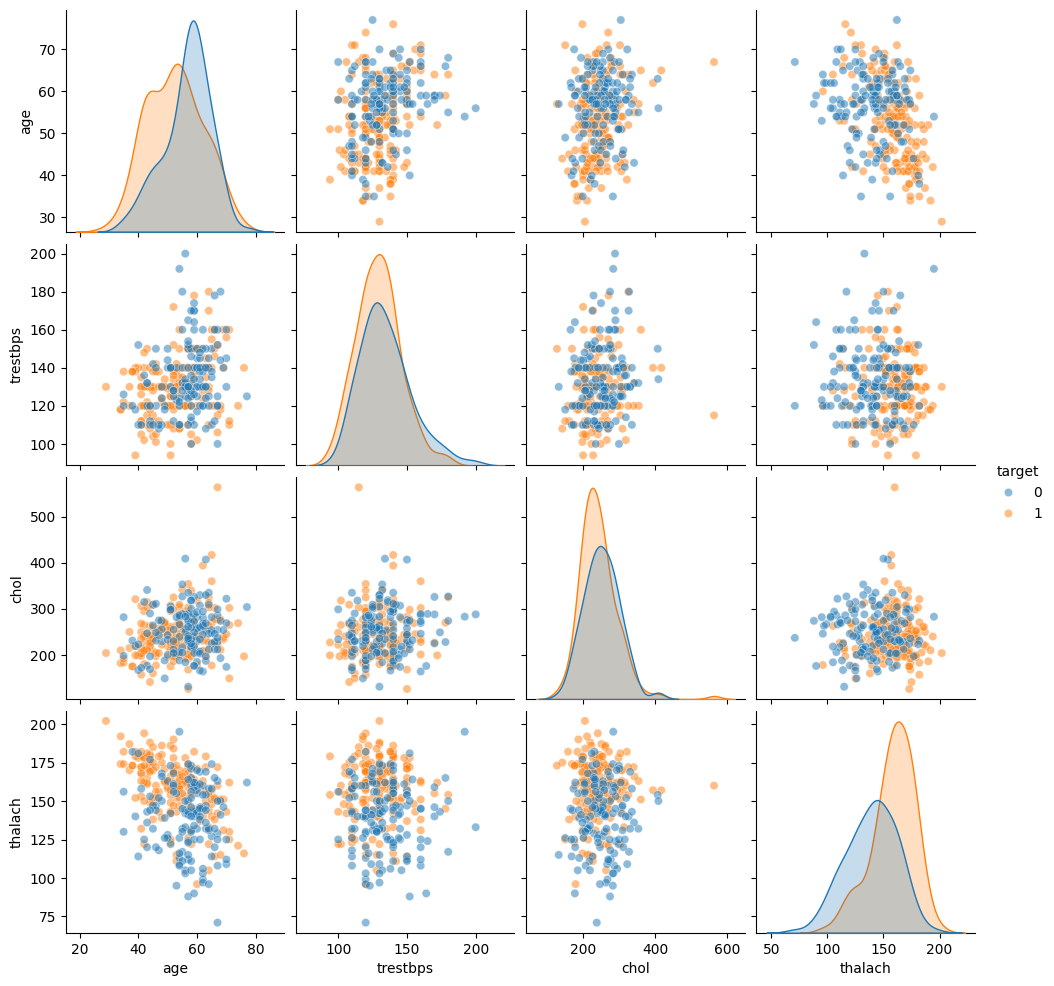

In [ ]:

sns.pairplot(df[["age" , "trestbps" , "chol" , "thalach" , "target"]] , hue = "target" , plot_kws={'alpha': 0.5} )

<Axes: >

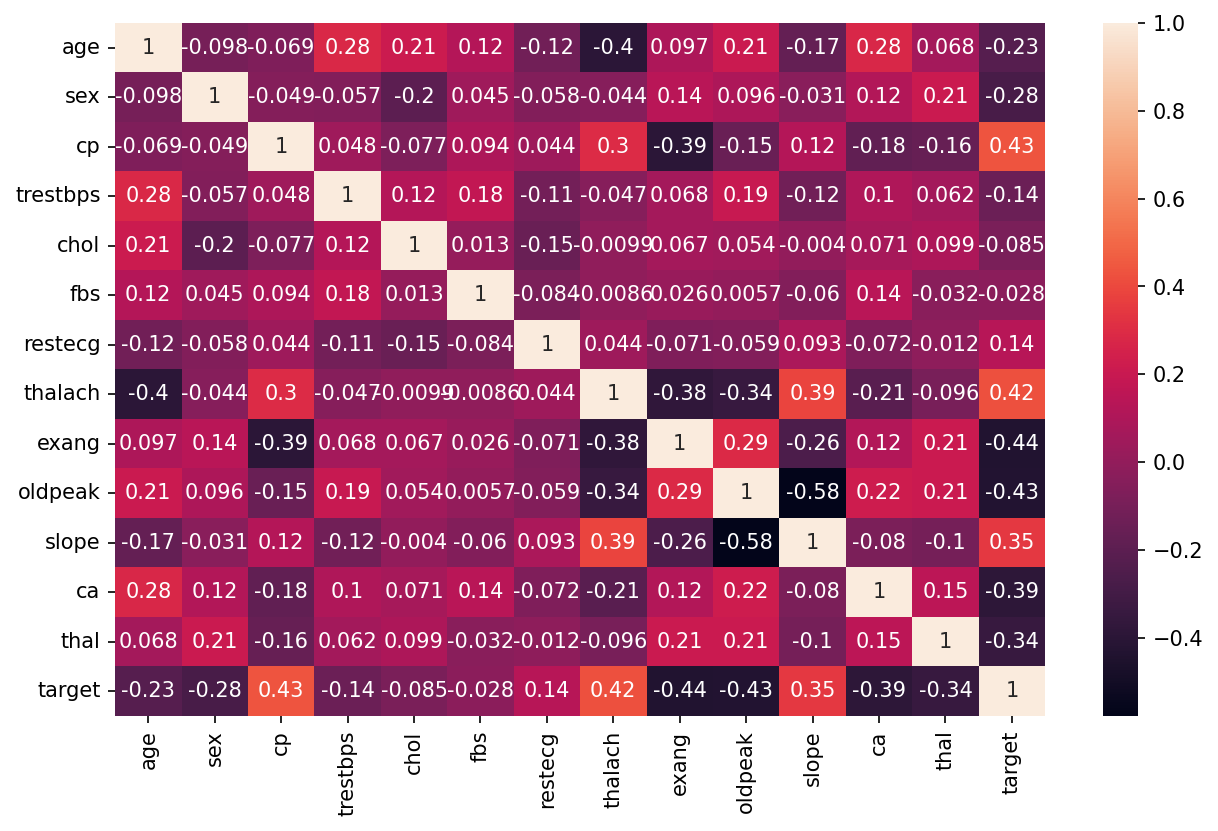

In [ ]:

plt.figure(figsize=(10,6) , dpi = 150)
sns.heatmap(df.corr() , annot = True) 

In [12]:

X = df.drop("target" , axis = 1) 
y = df["target"]

In [13]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [14]:

from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler() 

In [16]:
scaler.fit(X_train) 

StandardScaler()

In [17]:
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [18]:

from sklearn.linear_model import LogisticRegressionCV

In [19]:
logistic_model = LogisticRegressionCV() 

In [20]:
logistic_model.fit(X_train  , y_train) 

LogisticRegressionCV()

In [21]:
logistic_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [22]:

logistic_model.C_

array([0.04641589])

In [23]:
logistic_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [24]:
logistic_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [25]:
logistic_model.coef_[0]

array([-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
        0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
        0.25100118, -0.49732614, -0.37440968])

In [26]:

coefficient = pd.Series(data = logistic_model.coef_[0] , index = X.columns)

In [27]:
coefficient.index

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [28]:
coefficient.values

array([-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
        0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
        0.25100118, -0.49732614, -0.37440968])

<Axes: >

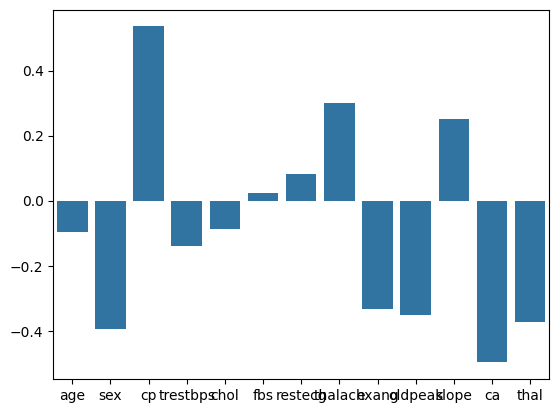

In [29]:
sns.barplot(coefficient)

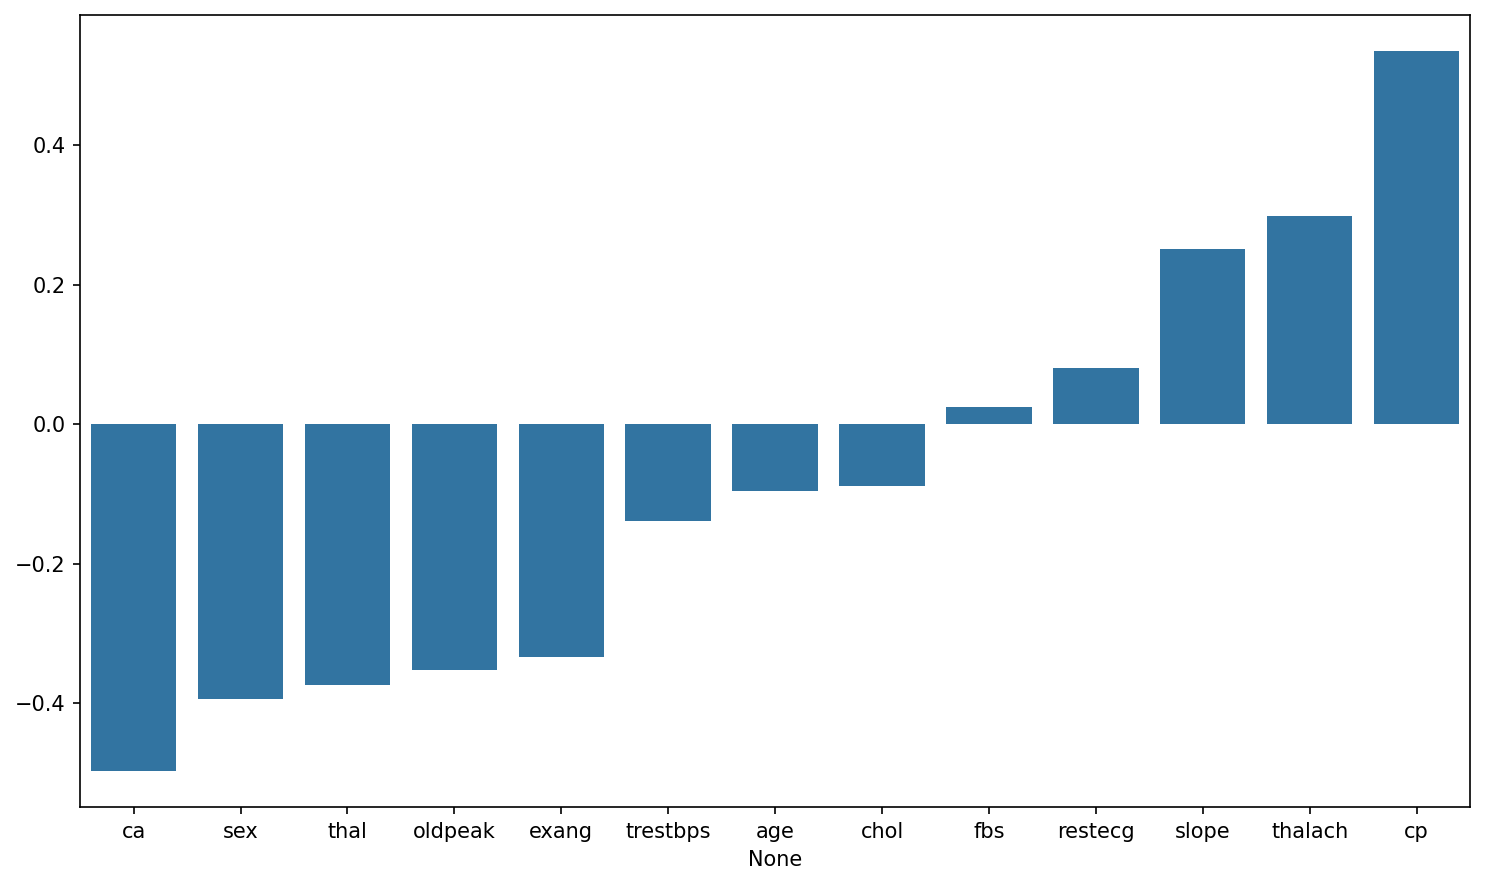

In [30]:
coefficient = coefficient.sort_values() 
plt.figure(figsize=(10,6) , dpi = 150)
sns.barplot(x = coefficient.index , y = coefficient.values) 
plt.tight_layout()


In [31]:

from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay

In [32]:
y_predictions = logistic_model.predict(X_test)

In [33]:
y_predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0])

In [34]:
logistic_model.predict_proba(X_test)

array([[0.97443966, 0.02556034],
       [0.25231888, 0.74768112],
       [0.35351879, 0.64648121],
       [0.07905754, 0.92094246],
       [0.93100574, 0.06899426],
       [0.19157869, 0.80842131],
       [0.13320178, 0.86679822],
       [0.94136743, 0.05863257],
       [0.90152056, 0.09847944],
       [0.2853904 , 0.7146096 ],
       [0.91933789, 0.08066211],
       [0.30154453, 0.69845547],
       [0.87275312, 0.12724688],
       [0.56498841, 0.43501159],
       [0.18652374, 0.81347626],
       [0.23680072, 0.76319928],
       [0.05386815, 0.94613185],
       [0.31384763, 0.68615237],
       [0.21469971, 0.78530029],
       [0.94142876, 0.05857124],
       [0.95958602, 0.04041398],
       [0.40593103, 0.59406897],
       [0.3917476 , 0.6082524 ],
       [0.30377522, 0.69622478],
       [0.53069223, 0.46930777],
       [0.1131206 , 0.8868794 ],
       [0.93633458, 0.06366542],
       [0.28288979, 0.71711021],
       [0.91785138, 0.08214862],
       [0.8563549 , 0.1436451 ],
       [0.

In [35]:
cm = confusion_matrix(y_true= y_test , y_pred= y_predictions)
cm

array([[12,  3],
       [ 2, 14]])

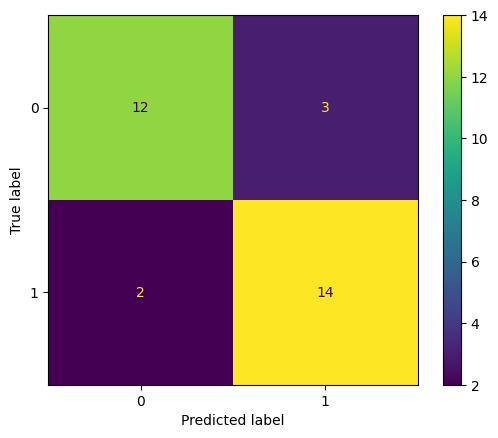

In [ ]:

ConfusionMatrixDisplay(confusion_matrix= cm).plot()

In [ ]:

print(classification_report(y_true = y_test,y_pred= y_predictions))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [38]:

from sklearn.metrics import precision_recall_curve, roc_curve , RocCurveDisplay , PrecisionRecallDisplay

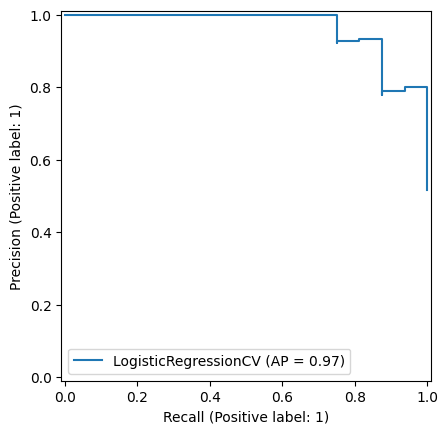

In [39]:
PrecisionRecallDisplay.from_estimator(logistic_model , X_test , y_test)

In [40]:

roc_curve(y_true = y_test , y_score = y_predictions)

(array([0. , 0.2, 1. ]), array([0.   , 0.875, 1.   ]), array([inf,  1.,  0.]))

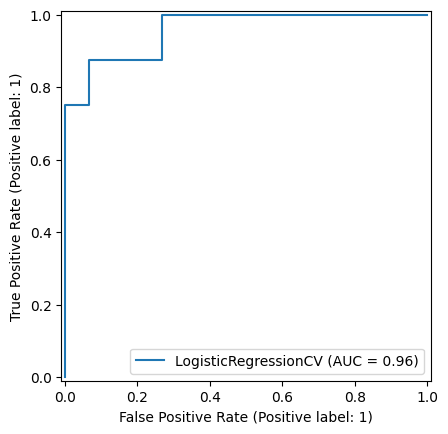

In [41]:
RocCurveDisplay.from_estimator(logistic_model , X_test , y_test)